In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

* here we need non linear line 

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

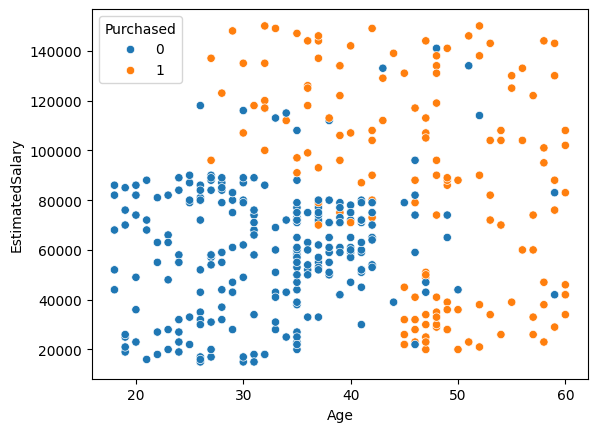

In [9]:
sns.scatterplot(x="Age",y='EstimatedSalary',data =  df, hue='Purchased')

* this is non linear line

In [11]:
x= df.iloc[:,:-1]
y= df['Purchased']

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

* prediction with gini test 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt= DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

* here first of all we are run just model then pruning use


In [50]:
dt.score(x_test,y_test)*100

91.25

In [51]:
dt.score (x_train,y_train)*100

91.875

here we use pree pruning then decreases the overfitting

In [52]:
dt.predict([[19,19000]])

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
dt.predict([[35,20000]])

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

* here accurecy is 83% but data predict is not good.

In [54]:
from sklearn.tree import plot_tree

* now we see how to non linear line split

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

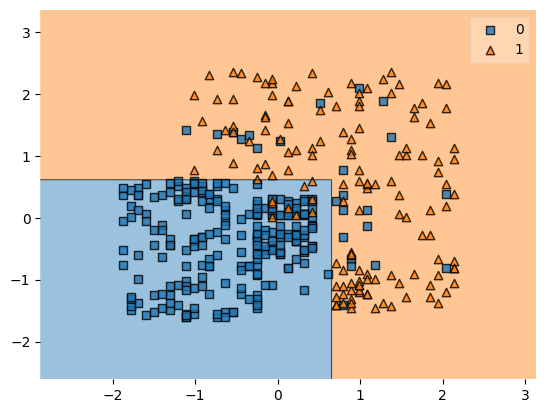

In [55]:
plot_decision_regions (x.to_numpy(),y.to_numpy(),clf = dt)

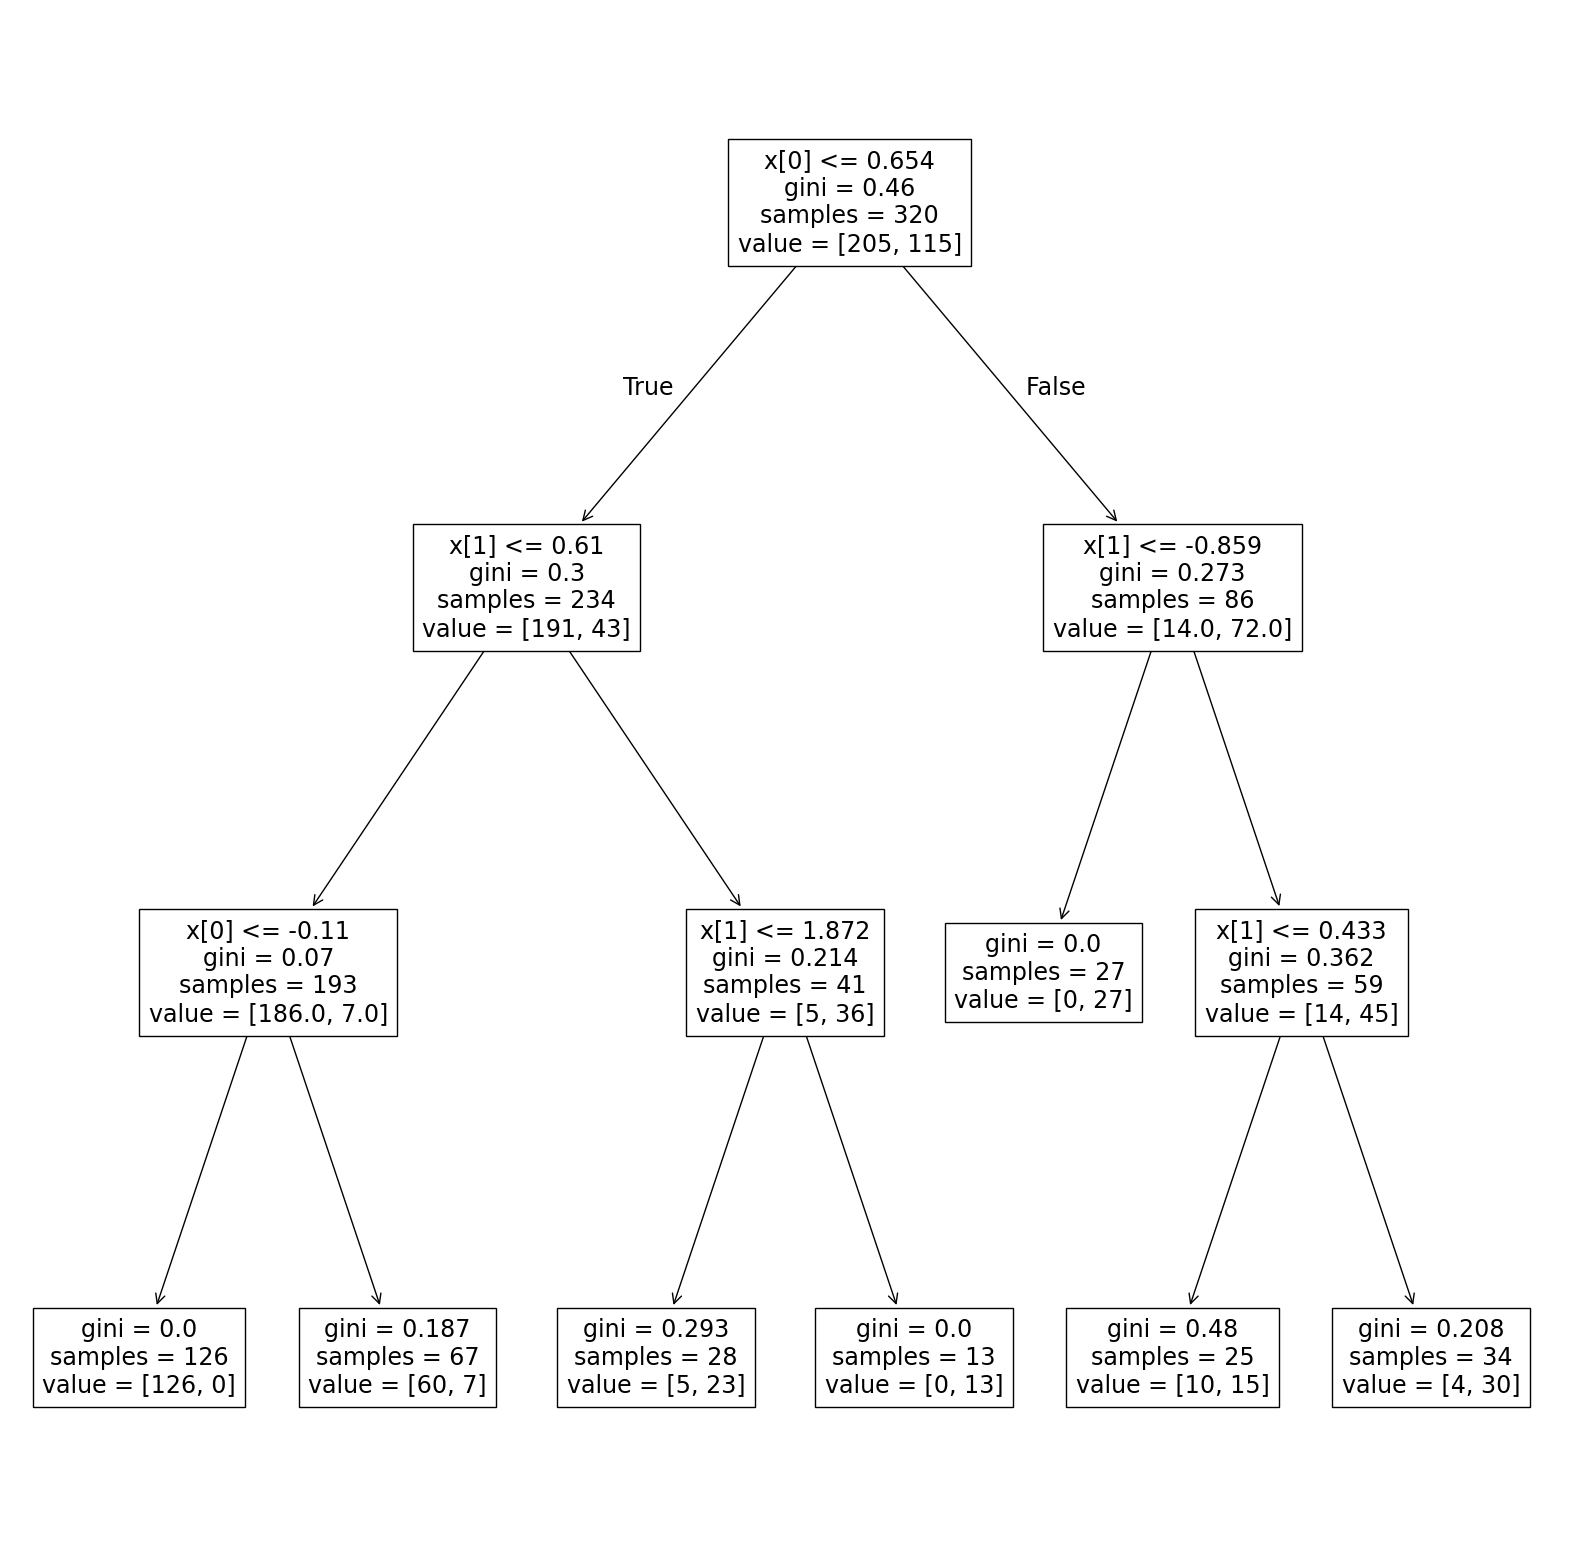

In [56]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig('demo.png')
plt.show()

In [57]:
x_train.shape

(320, 2)

* now we are prediction with entropy

In [58]:
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
dt1.score(x_test,y_test)*100

83.75

* gini test and entropy test there are no deference here

# pruning

In [60]:
dt.score (x_train,y_train)*100

91.875

* here training and testing accuricy is more difrence.this means this model is overfitted.

* here this model is over fited so we are use pruning.

# first off all we are apply pree pruning

In [61]:
#dt= DecisionTreeClassifier(max_depth=5)
#dt.fit(x_train,y_train)

model here we can work

# post pruning

In [62]:
for i in range (1,20):
    dt2= DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i ) 

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


* now we change the max depth value and check